A PDF reader application may have the following computer vision tasks:

    Optical Character Recognition (OCR): to convert scanned or image-based PDFs into searchable and editable text.

    Document layout analysis: to identify and extract text, tables, and images within a PDF document and preserve their relative positions.

    Image enhancement: to improve the clarity and readability of images within a PDF document.

    Text recognition and classification: to identify and categorize different types of text within a PDF document (e.g. header, body text, footer).

    Table extraction: to identify and extract tables within a PDF document, preserving the structure and formatting.

These tasks help to make PDFs more accessible, searchable, and usable for various purposes such as information retrieval, data analysis, and document management.

In [1]:
import io #The io module provides Python’s main facilities for dealing with various types of I/O.
import json #JSON (JavaScript Object Notation) is a lightweight data-interchange format
import cv2 # cv2.imread(), cv2.imshow() , cv2.imwrite()
import numpy as np #create a NumPy array, use broadcasting, access values, manipulate arrays, and much more
import requests #Make a request to a web page, and print the response text
import matplotlib.pyplot as plt  #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [2]:
import easyocr #easyocr is a python package that provides a simple interface to use several OCR engines and easily integrate OCR into your applications.


c:\Users\ranas\anaconda3\envs\my_init\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [4]:
from PIL import Image, ImageDraw, ImageFont

In [5]:
img_pil = Image.open("image.jpg")
MAX_SIZE = 2000
if img_pil.height > MAX_SIZE or img_pil.width > MAX_SIZE:
    scale = max(img_pil.height / MAX_SIZE, img_pil.width / MAX_SIZE)

    new_width = int(img_pil.width / scale + 0.5)
    new_height = int(img_pil.height / scale + 0.5)
    img_pil = img_pil.resize((new_width, new_height), Image.BICUBIC)

print(img_pil.width, img_pil.height)

463 894


In [7]:
reader = easyocr.Reader(['ch_sim','en'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [9]:
import cv2

image = cv2.imread('image.jpg') # read image

# perform character recognition
result = reader.readtext(image,detail = 1)


[([[100, 28], [160, 28], [160, 60], [100, 60]], 'tan', 0.7496312260627747),
 ([[249, 29], [315, 29], [315, 69], [249, 69]], 'yee', 0.996921519672817),
 ([[141, 99], [177, 99], [177, 113], [141, 113]], '本牛本', 0.005324444690717918),
 ([[178, 96], [234, 96], [234, 120], [178, 120]], 'COPY', 0.9970036149024963),
 ([[237, 99], [273, 99], [273, 113], [237, 113]], '本本本', 0.007660276402606154),
 ([[86, 115], [328, 115], [328, 143], [86, 143]],
  'OJC MARKETING SDN BHD',
  0.9090862662428102),
 ([[126, 140], [288, 140], [288, 164], [126, 164]],
  'ROC NO: 538358-4',
  0.6995406936034755),
 ([[109, 165], [301, 165], [301, 185], [109, 185]],
  'NO 2 &4, JALAN BAYU 4',
  0.7172381458683745),
 ([[127, 185], [289, 185], [289, 205], [127, 205]],
  'BANDAR SERLALAN,',
  0.6121140414719688),
 ([[121, 207], [291, 207], [291, 227], [121, 227]],
  '81750 MASAI,JOHOR',
  0.6090171375807801),
 ([[74, 226], [340, 226], [340, 250], [74, 250]],
  'Tel:07-3882218 Fax:07-388 8218',
  0.4343660590572792),
 ([[112

In [10]:

# iterate on all results
for res in result:
    x,y = res[0][0] # top left coordinates

    top_left = (int(x),int(y)) # top left coordinates as tuple
    z,w = res[0][2] # bottom right coordinates
    bottom_right = (int(z),int(w)) # bottom right coordinates as tuple
    # draw rectangle on image
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2) 
    # write recognized text on image (top_left) minus 10 pixel on y
    cv2.putText(image, res[1], (top_left[0], top_left[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# show image


In [70]:
def writeToImage():
    filename = 'savedImage.jpg'
    print(image.shape)

    img = np.ones((image.shape[0],image.shape[1], 3), dtype = np.uint8)
    img = 255*img
    # Using cv2.imwrite() method
    # Saving the image
    cv2.imwrite(filename, img)
    imgWrite = cv2.imread(filename)



    # iterate on all results
    for res in result:
        x,y = res[0][0] # top left coordinates

        top_left = (int(x),int(y)) # top left coordinates as tuple
        z,w = res[0][2] # bottom right coordinates
        bottom_right = (int(z),int(w)) # bottom right coordinates as tuple
        # draw rectangle on image
        # write recognized text on image (top_left) minus 10 pixel on y
        cv2.putText(imgWrite, res[1], (top_left[0], top_left[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)

    
    cv2.imwrite(filename, imgWrite)
    imgWrite = cv2.imread(filename)

In [71]:
writeToImage()





(894, 463, 3)


In [33]:
from PIL import Image, ImageDraw, ImageFont

In [34]:
img_pil = Image.open("image.jpg")
MAX_SIZE = 2000
if img_pil.height > MAX_SIZE or img_pil.width > MAX_SIZE:
    scale = max(img_pil.height / MAX_SIZE, img_pil.width / MAX_SIZE)

    new_width = int(img_pil.width / scale + 0.5)
    new_height = int(img_pil.height / scale + 0.5)
    img_pil = img_pil.resize((new_width, new_height), Image.BICUBIC)

print(img_pil.width, img_pil.height)

463 894


In [39]:
result = reader.readtext(img_pil,detail = 1)
result

[([[100, 28], [160, 28], [160, 60], [100, 60]], 'tan', 0.7079381346702576),
 ([[249, 29], [315, 29], [315, 69], [249, 69]], 'yee', 0.9964816440750875),
 ([[141, 99], [177, 99], [177, 113], [141, 113]], '本牛本', 0.005324444690717918),
 ([[178, 96], [234, 96], [234, 120], [178, 120]], 'COPY', 0.9970036149024963),
 ([[237, 99], [273, 99], [273, 113], [237, 113]], '本本本', 0.007660276402606154),
 ([[86, 115], [328, 115], [328, 143], [86, 143]],
  'OJC MARKETING SDN BHD',
  0.9090862662428102),
 ([[126, 140], [288, 140], [288, 164], [126, 164]],
  'ROC NO: 538358-4',
  0.6995406936034755),
 ([[109, 165], [301, 165], [301, 185], [109, 185]],
  'NO 2 &4, JALAN BAYU 4',
  0.7172381458683745),
 ([[127, 185], [289, 185], [289, 205], [127, 205]],
  'BANDAR SERLALAN,',
  0.6121140414719688),
 ([[121, 207], [291, 207], [291, 227], [121, 227]],
  '81750 MASAI,JOHOR',
  0.6090171375807801),
 ([[74, 226], [340, 226], [340, 250], [74, 250]],
  'Tel:07-3882218 Fax:07-388 8218',
  0.4343660590572792),
 ([[11

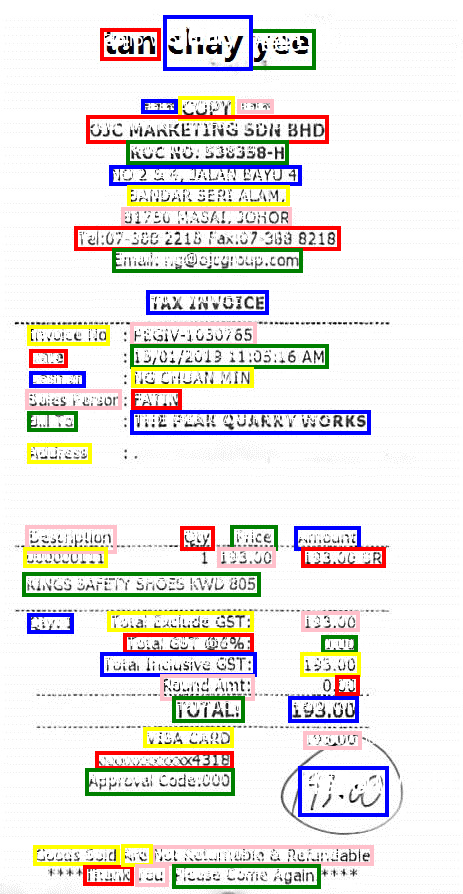

In [66]:
gray_pil = img_pil.convert("L")
img_draw = ImageDraw.Draw(img_pil)
colors = ['red', 'green', 'blue', "yellow", "pink"]

for i, rect in enumerate(result):
    bottomX, bottomY, topX , topY = rect[0]
    x, y, w, h = bottomX[0], bottomX[1] , bottomY[0]- bottomX[0] ,topX[1] - bottomX[1] 
    img_draw.rectangle(
        (x, y, x + w, y + h),
        outline=colors[i % len(colors)],
        width=4)

img_pil

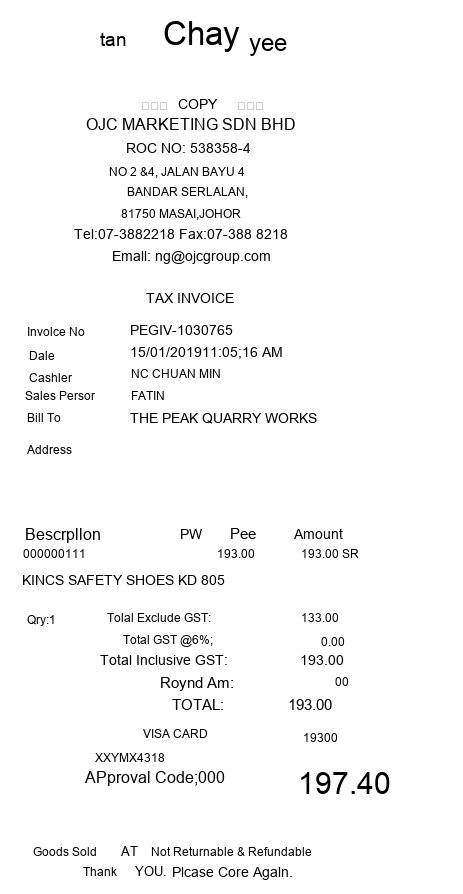

In [72]:
blank_pil = Image.new("L", img_pil.size, 255)
blank_draw = ImageDraw.Draw(blank_pil)

for line in result:
    bottomX, bottomY, topX , topY = line[0]
    x, y, w, h = bottomX[0], bottomX[1] , bottomY[0]- bottomX[0] ,topX[1] - bottomX[1] 
    txt = line[1]
    font = ImageFont.truetype("arial.ttf", max(int(h * 0.6), 12))
    blank_draw.text(xy=(x, y), text=txt, font=font)

blank_pil